In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

In [2]:
import numpy as np
import random

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

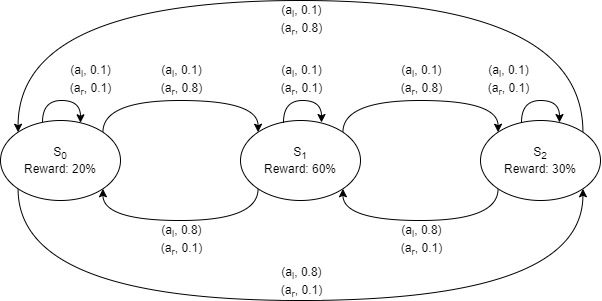

In [3]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [4]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + a) % STATE_COUNT
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1],
       [0.1, 0.1, 0.8]])

In [5]:
OBS_RND = 0.7 # 70% of observation success
def observation_function(s_p, a, o):
    return OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = observation_function(s_p, a, o)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [6]:
REWARD_PROBS = [0.2, 0.6, 0.3]

def reward_function(s, a):
    tot = 0.0
    for s_p in range(STATE_COUNT):
        tot += (REWARD_PROBS[s_p] * transition_table[s,a,s_p])
    return tot

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        reward_table[s,a] = reward_function(s,a)
        
reward_table

array([[0.25, 0.53],
       [0.53, 0.32],
       [0.32, 0.25]])

In [7]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = POMDP_Model(states, actions, observations, transition_table, reward_table, observation_table)

## Solving

In [8]:
solver = PBVI_Solver(model)

In [9]:
value_function = solver.solve(8,4)

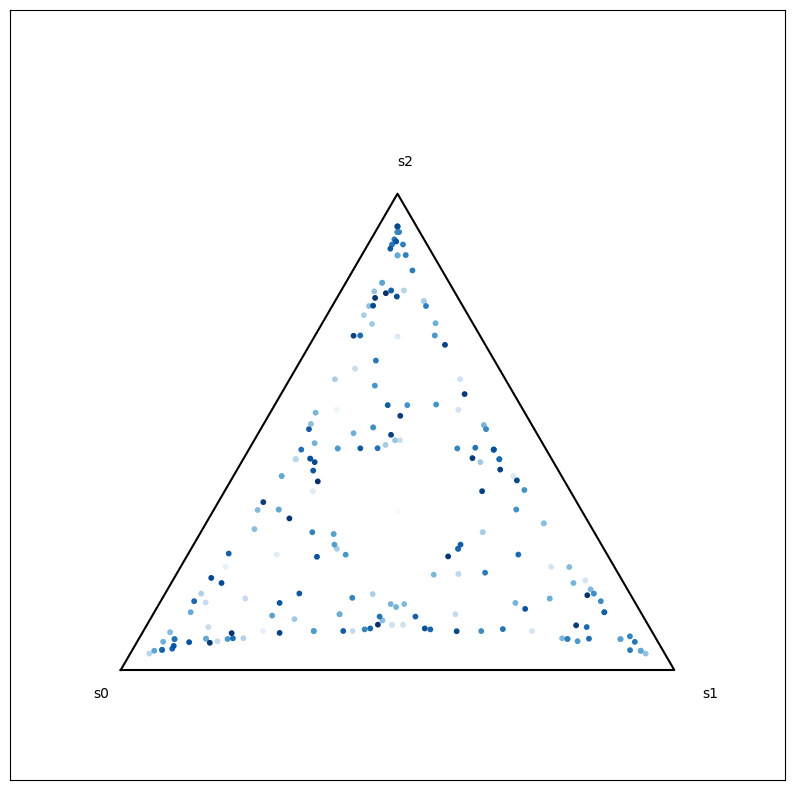

In [10]:
solver.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([4.33596396, 4.01066856, 4.09421068]),
 AlphaVector([4.04056364, 4.37497584, 3.96616583]),
 AlphaVector([4.37497584, 3.96616583, 4.04056364]),
 AlphaVector([4.31369027, 3.99862847, 4.10680821]),
 AlphaVector([4.32800463, 3.99758621, 4.10434926]),
 AlphaVector([4.36375589, 3.96493051, 4.06739445]),
 AlphaVector([4.33180577, 3.99772569, 4.10335314]),
 AlphaVector([4.39392139, 3.94583586, 3.91904774]),
 AlphaVector([3.91904774, 4.39392139, 3.94583586]),
 AlphaVector([4.09440271, 4.33617869, 4.01013309]),
 AlphaVector([4.05384273, 4.37157644, 3.96384406]),
 AlphaVector([4.10201113, 4.33447206, 3.99425986]),
 AlphaVector([4.34708399, 4.01179849, 4.06622829]),
 AlphaVector([4.06253545, 4.34689417, 4.01289995]),
 AlphaVector([4.37496429, 3.96621057, 4.040549  ]),
 AlphaVector([4.37157644, 3.96384406, 4.05384273]),
 AlphaVector([4.33447206, 3.99425986, 4.10201113]),
 AlphaVector([4.06622829, 4.34708399, 4.01179849]),
 AlphaVector([4.10201952, 4.33445581, 3.99429799]),
 AlphaVector

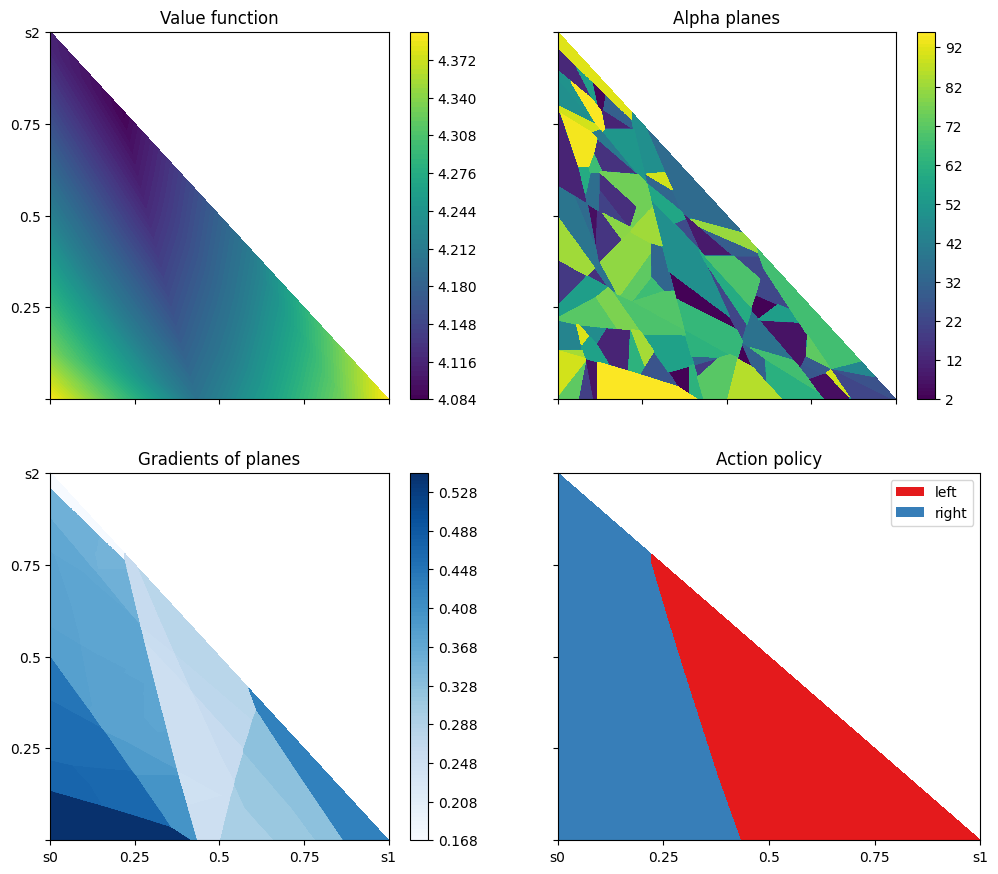

In [12]:
solver.plot_solution(3, plot_belief=False)

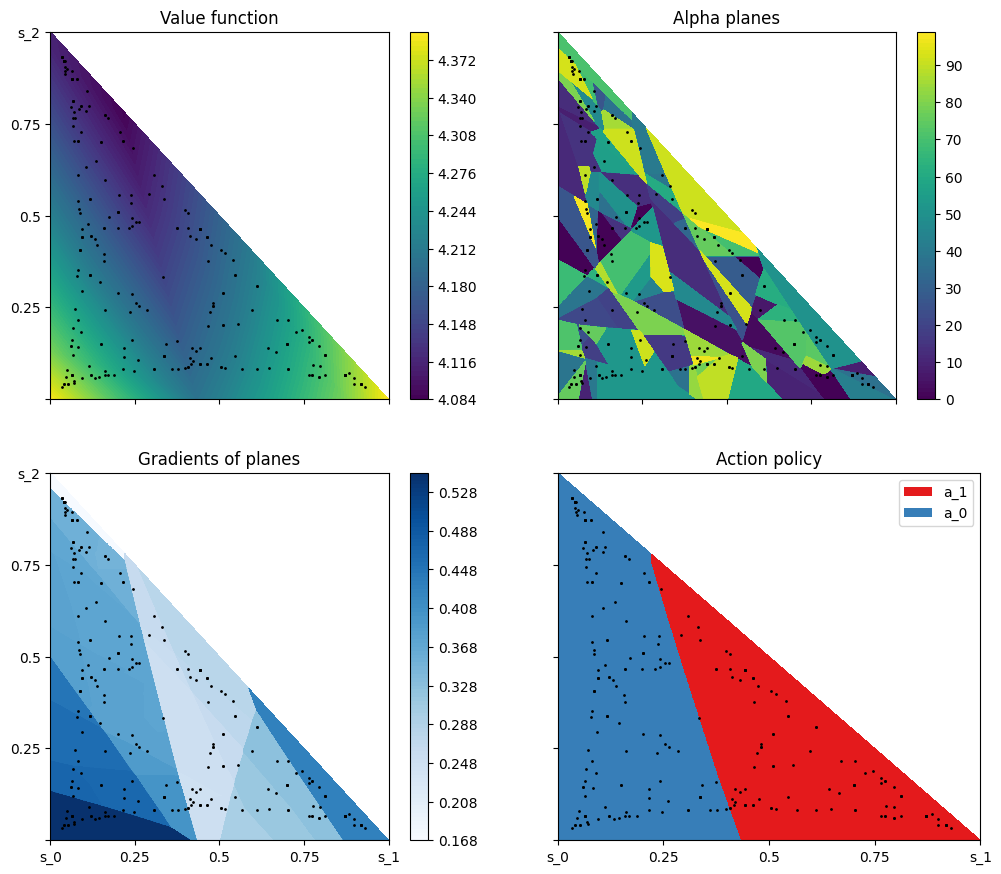

In [13]:
value_function.plot(3, belief_set=solver.explored_beliefs)